# Stock Market Prediction of S&P500 companies using Machine Learning Techniques

In [420]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [421]:
data=pd.read_csv("S&P500IT.csv")
data

,Date,Price,Open,High,Low,Vol.,Change %
0,06/28/2024,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M,-0.43%
1,06/27/2024,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M,-0.06%
2,06/26/2024,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M,0.37%
3,06/25/2024,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M,1.79%
4,06/24/2024,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M,-2.07%
...,...,...,...,...,...,...,...
4149,01/08/2008,370.6,381.3,385.1,370.5,9.81M,-2.79%
4150,01/07/2008,381.3,384.2,385.4,376.3,10.27M,-0.76%
4151,01/04/2008,384.2,402.3,402.3,383.5,10.67M,-4.51%
4152,01/03/2008,402.3,403.2,404.8,400.0,7.19M,-0.22%


In [422]:
data.shape

(4154, 7)

In [423]:
data=data.drop(columns=['Date'])
data

,Price,Open,High,Low,Vol.,Change %
0,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M,-0.43%
1,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M,-0.06%
2,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M,0.37%
3,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M,1.79%
4,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M,-2.07%
...,...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M,-2.79%
4150,381.3,384.2,385.4,376.3,10.27M,-0.76%
4151,384.2,402.3,402.3,383.5,10.67M,-4.51%
4152,402.3,403.2,404.8,400.0,7.19M,-0.22%


In [424]:
data.describe()

,Price,Open,High,Low,Vol.,Change %
count,4154,4154,4154,4154,2528,4154
unique,3559,3570,3528,3572,1834,726
top,354.8,354.8,350.0,417.0,6.77M,0.00%
freq,6,5,5,5,9,34


In [425]:
data.isnull().sum()

Price          0
Open           0
High           0
Low            0
Vol.        1626
Change %       0
dtype: int64

In [426]:
df=data.dropna()
df

,Price,Open,High,Low,Vol.,Change %
0,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M,-0.43%
1,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M,-0.06%
2,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M,0.37%
3,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M,1.79%
4,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M,-2.07%
...,...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M,-2.79%
4150,381.3,384.2,385.4,376.3,10.27M,-0.76%
4151,384.2,402.3,402.3,383.5,10.67M,-4.51%
4152,402.3,403.2,404.8,400.0,7.19M,-0.22%


In [427]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 4153
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2528 non-null   object
 1   Open      2528 non-null   object
 2   High      2528 non-null   object
 3   Low       2528 non-null   object
 4   Vol.      2528 non-null   object
 5   Change %  2528 non-null   object
dtypes: object(6)
memory usage: 138.2+ KB


In [429]:
df.drop(columns=['Change %'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\1658844372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Change %'],inplace=True)


,Price,Open,High,Low,Vol.
0,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M
1,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M
2,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M
3,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M
4,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M
...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M
4150,381.3,384.2,385.4,376.3,10.27M
4151,384.2,402.3,402.3,383.5,10.67M
4152,402.3,403.2,404.8,400.0,7.19M


In [430]:
df.sample(10)

,Price,Open,High,Low,Vol.
308,"2,608.8","2,591.2","2,611.6","2,561.9",346.27M
1091,"1,623.6","1,617.2","1,659.3","1,612.2",565.51M
3189,428.3,415.3,430.6,415.3,10.21M
3192,420.8,412.8,421.9,412.8,7.48M
3417,398.0,393.1,398.4,393.1,8.07M
789,"2,440.4","2,421.4","2,454.6","2,421.4",386.37M
417,"2,271.6","2,173.3","2,276.2","2,173.3",684.39M
59,"3,731.3","3,837.2","3,849.0","3,731.1",492.57M
3179,414.3,413.9,419.0,410.8,7.16M
3488,337.7,341.0,343.5,337.7,7.11M


In [431]:
def convert_vol(vol):
    if 'K' in vol:
        return float(vol.replace('K', ''))
    elif 'M' in vol:
        return float(vol.replace('M', '')) * 1000
    elif 'B' in vol:
        return float(vol.replace('B', '')) * 1000000
    else:
        return float(vol)/1000

def convert_to_num(dt):
    if ',' in dt:
        return float(dt.replace(',',''))
    else:
        return float(dt)

In [432]:
df['Volume(K)']=df['Vol.'].apply(convert_vol)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\3236443624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume(K)']=df['Vol.'].apply(convert_vol)


,Price,Open,High,Low,Vol.,Volume(K)
0,"4,341.1","4,376.9","4,429.2","4,338.8",904.40M,904400.0
1,"4,359.8","4,355.0","4,385.9","4,343.4",644.81M,644810.0
2,"4,362.6","4,349.7","4,375.0","4,329.6",744.97M,744970.0
3,"4,346.5","4,300.3","4,352.0","4,286.6",782.95M,782950.0
4,"4,269.9","4,327.1","4,348.1","4,269.9",894.78M,894780.0
...,...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M,9810.0
4150,381.3,384.2,385.4,376.3,10.27M,10270.0
4151,384.2,402.3,402.3,383.5,10.67M,10670.0
4152,402.3,403.2,404.8,400.0,7.19M,7190.0


In [433]:
df['Price']=df['Price'].apply(convert_to_num)
df['Open']=df['Open'].apply(convert_to_num)
df['High']=df['High'].apply(convert_to_num)
df['Low']=df['Low'].apply(convert_to_num)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\1879019303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\1879019303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open']=df['Open'].apply(convert_to_num)
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\1879019303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Price,Open,High,Low,Vol.,Volume(K)
0,4341.1,4376.9,4429.2,4338.8,904.40M,904400.0
1,4359.8,4355.0,4385.9,4343.4,644.81M,644810.0
2,4362.6,4349.7,4375.0,4329.6,744.97M,744970.0
3,4346.5,4300.3,4352.0,4286.6,782.95M,782950.0
4,4269.9,4327.1,4348.1,4269.9,894.78M,894780.0
...,...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9.81M,9810.0
4150,381.3,384.2,385.4,376.3,10.27M,10270.0
4151,384.2,402.3,402.3,383.5,10.67M,10670.0
4152,402.3,403.2,404.8,400.0,7.19M,7190.0


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2528 entries, 0 to 4153
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      2528 non-null   float64
 1   Open       2528 non-null   float64
 2   High       2528 non-null   float64
 3   Low        2528 non-null   float64
 4   Vol.       2528 non-null   object 
 5   Volume(K)  2528 non-null   float64
dtypes: float64(5), object(1)
memory usage: 138.2+ KB


In [435]:
df.drop(columns=['Vol.'], inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\1067798956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Vol.'], inplace=True)


,Price,Open,High,Low,Volume(K)
0,4341.1,4376.9,4429.2,4338.8,904400.0
1,4359.8,4355.0,4385.9,4343.4,644810.0
2,4362.6,4349.7,4375.0,4329.6,744970.0
3,4346.5,4300.3,4352.0,4286.6,782950.0
4,4269.9,4327.1,4348.1,4269.9,894780.0
...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9810.0
4150,381.3,384.2,385.4,376.3,10270.0
4151,384.2,402.3,402.3,383.5,10670.0
4152,402.3,403.2,404.8,400.0,7190.0


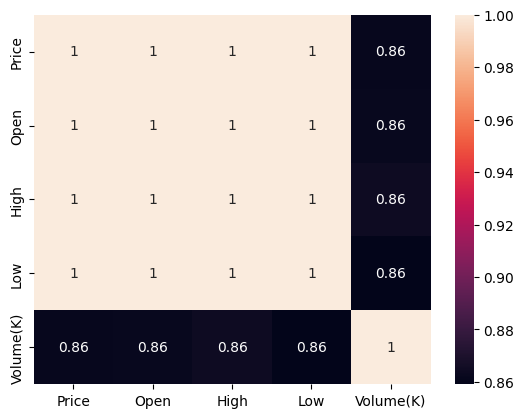

In [436]:
sns.heatmap(df.corr(),annot=True)
plt.show()

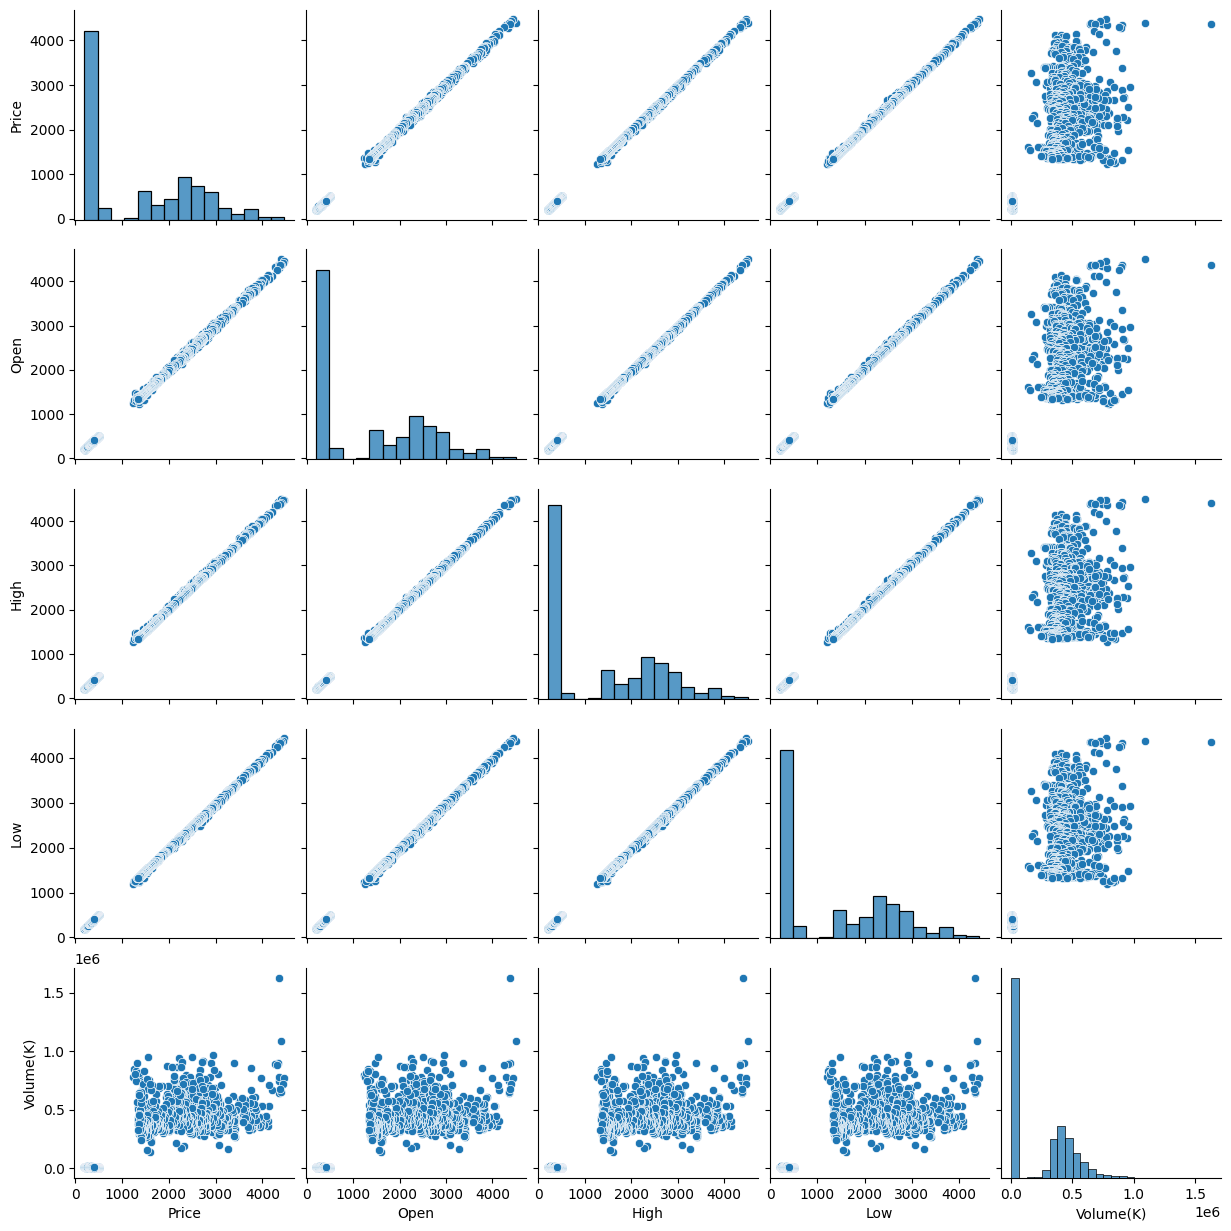

In [437]:
sns.pairplot(df,kind='scatter')
plt.show()

## Simple Linear Regression

## Taking Open as independent feature and close as dependent fearture

<function matplotlib.pyplot.show(close=None, block=None)>

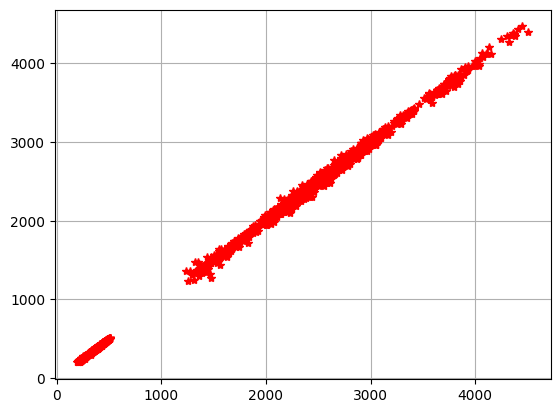

In [438]:
plt.plot(df['Open'],df['Price'],'r*')
plt.grid(True)
plt.show

In [439]:
X=df[['Open']]
X

,Open
0,4376.9
1,4355.0
2,4349.7
3,4300.3
4,4327.1
...,...
4149,381.3
4150,384.2
4151,402.3
4152,403.2


In [440]:
y=df['Price']
y

0       4341.1
1       4359.8
2       4362.6
3       4346.5
4       4269.9
         ...  
4149     370.6
4150     381.3
4151     384.2
4152     402.3
4153     403.2
Name: Price, Length: 2528, dtype: float64

In [441]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [442]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [443]:
lr.fit(X_train,y_train)

LinearRegression()

In [444]:
print(f"Coefficient : {lr.coef_}\nintercept : {lr.intercept_}")

Coefficient : [1.00026241]
intercept : 0.380044131716204


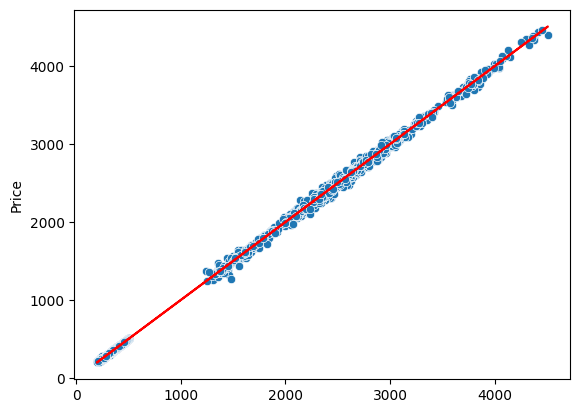

In [445]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),color='red')
plt.show()

In [446]:
pred=lr.predict(X_test)

In [447]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [448]:
import math
def find_RMSE(pred,actual):
    return math.sqrt(mean_squared_error(actual,pred))

def find_adj_r2(pred,actual):
    return 1-((1-r2_score(pred,actual))*(len(actual)-1)/(len(actual)-X_train.shape[1]-1))

In [449]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 15.273458592906486
MSE : 660.3208182935134
RMSE : 25.69670831630996
R2 : 0.9994446510596328
Adj R2 : 0.9994416645655811


In [450]:
lr_mae=mean_absolute_error(y_test,pred)
lr_rmse=find_RMSE(pred,y_test)
lr_r2=r2_score(y_test,pred)

In [451]:
dt={
    'Simple_LinearReg' : [mean_absolute_error(y_test,pred)]}
mean_abs_err=pd.DataFrame(dt)
mean_abs_err

,Simple_LinearReg
0,15.273459


In [452]:
dt={
    'Simple_LinearReg' : [find_RMSE(pred,y_test)]
}
root_mean_sq_err=pd.DataFrame(dt)
root_mean_sq_err

,Simple_LinearReg
0,25.696708


In [453]:
dt={
    'Simple_LinearReg' : [r2_score(y_test,pred)]
}
R2_score=pd.DataFrame(dt)
R2_score

,Simple_LinearReg
0,0.999445


## Ridge Regression

In [454]:
from sklearn.linear_model import Ridge

In [455]:
rr=Ridge(alpha=0.1)

In [456]:
rr.fit(X_train,y_train)

Ridge(alpha=0.1)

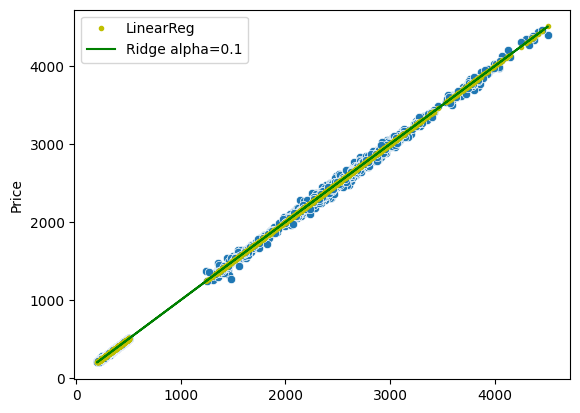

In [457]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'y.',label='LinearReg')
plt.plot(X_val,rr.predict(X_train),color='green',label='Ridge alpha=0.1')
plt.legend()
plt.show()

In [458]:
print(rr.coef_,rr.intercept_)

[1.00026241] 0.38004417882007147


In [459]:
y_pred=rr.predict(X_test)

In [460]:
print(f"MAE : {mean_absolute_error(y_test,y_pred)}\nMSE : {mean_squared_error(y_test,y_pred)}\nRMSE : {find_RMSE(y_pred,y_test)}\nR2 : {r2_score(y_test,y_pred)}\nAdj R2 : {find_adj_r2(y_pred,y_test)}")

MAE : 15.273458595569865
MSE : 660.3208183219722
RMSE : 25.696708316863702
R2 : 0.9994446510596088
Adj R2 : 0.9994416645655202


In [461]:
rr_mae=mean_absolute_error(y_test,y_pred)
rr_rmse=find_RMSE(y_pred,y_test)
rr_r2=r2_score(y_test,y_pred)

In [462]:
mean_abs_err['Ridge_alpha_0.1']=[mean_absolute_error(y_test,y_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1
0,15.273459,15.273459


In [463]:
root_mean_sq_err['Ridge_alpha_0.1']=[find_RMSE(y_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1
0,25.696708,25.696708


In [464]:
R2_score['Ridge_alpha_0.1']=[r2_score(y_test,y_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1
0,0.999445,0.999445


## Lasso Regression

In [465]:
from sklearn.linear_model import Lasso

In [466]:
lsr=Lasso(alpha=0.1)

In [467]:
lsr.fit(X_train,y_train)

Lasso(alpha=0.1)

In [468]:
print(lsr.coef_,lsr.intercept_)

[1.00026233] 0.38015126795835386


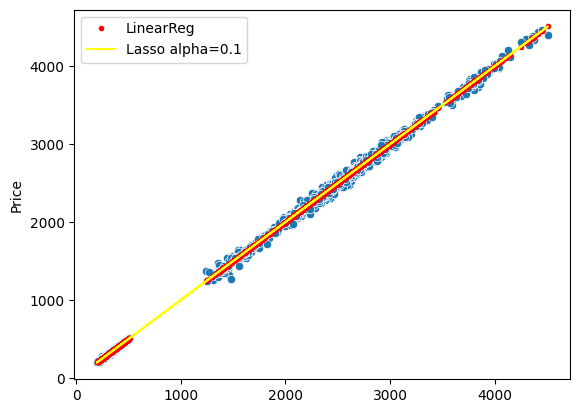

In [469]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lr.predict(X_train),'r.',label='LinearReg')
plt.plot(X_val,lsr.predict(X_train),color='yellow',label='Lasso alpha=0.1')
plt.legend()
plt.show()

In [470]:
yl_pred=lsr.predict(X_test)

In [471]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 15.273464650679925
MSE : 660.3208830293299
RMSE : 25.696709575922945
R2 : 0.9994446510051881
Adj R2 : 0.9994416644269607


In [472]:
lsr_mae=mean_absolute_error(y_test,yl_pred)
lsr_rmse=find_RMSE(yl_pred,y_test)
lsr_r2=r2_score(y_test,yl_pred)

In [473]:
mean_abs_err['Lasso_alpha_0.1']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,15.273459,15.273459,15.273465


In [474]:
root_mean_sq_err['Lasso_alpha_0.1']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,25.696708,25.696708,25.69671


In [475]:
R2_score['Lasso_alpha_0.1']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1
0,0.999445,0.999445,0.999445


## Polynomial Regression

In [476]:
from sklearn.preprocessing import PolynomialFeatures

In [477]:
poly=PolynomialFeatures(degree=4)

In [478]:
X_poly = poly.fit_transform(X_train)
X_test1=poly.transform(X_test)
poly.fit(X_poly,y_train)
lin=LinearRegression()
lin.fit(X_poly,y_train)

LinearRegression()

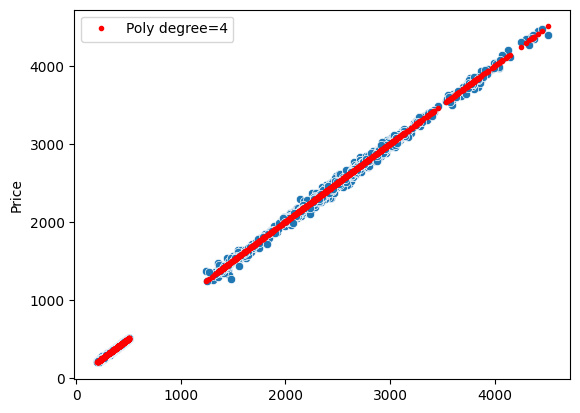

In [479]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'r.',label='Poly degree=4')
plt.legend()
plt.show()

In [480]:
yp_pred=lin.predict(X_test1)

In [481]:
print(f"MAE : {mean_absolute_error(y_test,yp_pred)}\nMSE : {mean_squared_error(y_test,yp_pred)}\nRMSE : {find_RMSE(yp_pred,y_test)}\nR2 : {r2_score(y_test,yp_pred)}\nAdj R2 : {find_adj_r2(yp_pred,y_test)}")

MAE : 15.271737694797348
MSE : 658.3916504259892
RMSE : 25.659143602739146
R2 : 0.9994462735457051
Adj R2 : 0.9994434657516442


In [482]:
poly_mae=mean_absolute_error(y_test,yp_pred)
poly_rmse=find_RMSE(yp_pred,y_test)
poly_r2=r2_score(y_test,yp_pred)

In [483]:
mean_abs_err['Poly_deg_4']=[mean_absolute_error(y_test,yp_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,15.273459,15.273459,15.273465,15.271738


In [484]:
root_mean_sq_err['Poly_deg_4']=[find_RMSE(yp_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,25.696708,25.696708,25.69671,25.659144


In [485]:
R2_score['Poly_deg_4']=r2_score(y_test,yp_pred)
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4
0,0.999445,0.999445,0.999445,0.999446


## Ridge on Polynomial Regression

In [486]:
ridp=Ridge(alpha=0.1)
ridp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.55979e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

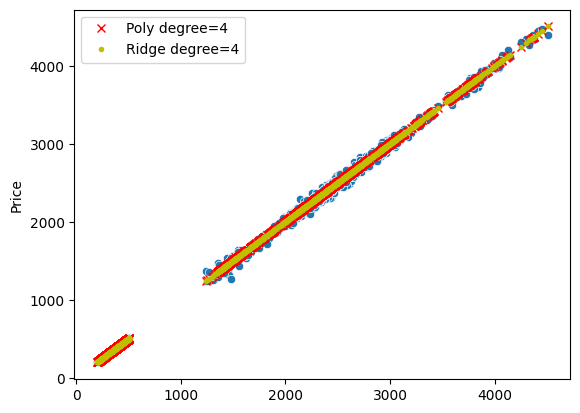

In [487]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'rx',label='Poly degree=4')
plt.plot(X_val,ridp.predict(X_poly),'y.',label='Ridge degree=4')
plt.legend()
plt.show()

In [488]:
yr_pred=ridp.predict(X_test1)

In [489]:
print(f"MAE : {mean_absolute_error(y_test,yr_pred)}\nMSE : {mean_squared_error(y_test,yr_pred)}\nRMSE : {find_RMSE(yr_pred,y_test)}\nR2 : {r2_score(y_test,yr_pred)}\nAdj R2 : {find_adj_r2(yr_pred,y_test)}")

MAE : 15.271574418375833
MSE : 658.3913076350906
RMSE : 25.659136923035636
R2 : 0.9994462738340023
Adj R2 : 0.9994434733116859


In [490]:
prr_mae=mean_absolute_error(y_test,yr_pred)
prr_rmse=find_RMSE(yr_pred,y_test)
prr_r2=r2_score(y_test,yr_pred)

In [491]:
mean_abs_err['Ridge_0.1_Poly_4']=[mean_absolute_error(y_test,yr_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,15.273459,15.273459,15.273465,15.271738,15.271574


In [492]:
root_mean_sq_err['Ridge_0.1_Poly_4']=[find_RMSE(yr_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,25.696708,25.696708,25.69671,25.659144,25.659137


In [493]:
R2_score['Ridge_0.1_Poly_4']=[r2_score(y_test,yr_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4
0,0.999445,0.999445,0.999445,0.999446,0.999446


## Lasso on polynomial of degree 4

In [494]:
lsp=Lasso(alpha=0.1)
lsp.fit(X_poly,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.287e+05, tolerance: 3.031e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

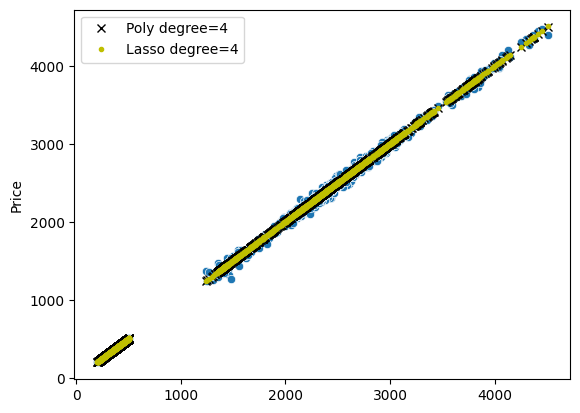

In [495]:
X_val=X_train['Open'].values
sns.scatterplot(x=X_val,y=y_train)
plt.plot(X_val,lin.predict(X_poly),'kx',label='Poly degree=4')
plt.plot(X_val,lsp.predict(X_poly),'y.',label='Lasso degree=4')
plt.legend()
plt.show()

In [496]:
yl_pred=lsp.predict(X_test1)

In [497]:
print(f"MAE : {mean_absolute_error(y_test,yl_pred)}\nMSE : {mean_squared_error(y_test,yl_pred)}\nRMSE : {find_RMSE(yl_pred,y_test)}\nR2 : {r2_score(y_test,yl_pred)}\nAdj R2 : {find_adj_r2(yl_pred,y_test)}")

MAE : 15.26548079638967
MSE : 658.384119173629
RMSE : 25.658996846596107
R2 : 0.9994462798797067
Adj R2 : 0.9994434716180176


In [498]:
plsr_mae=mean_absolute_error(y_test,yl_pred)
plsr_rmse=find_RMSE(yl_pred,y_test)
plsr_r2=r2_score(y_test,yl_pred)

In [499]:
mean_abs_err['Lasso_0.1_Poly_4']=[mean_absolute_error(y_test,yl_pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,15.273459,15.273459,15.273465,15.271738,15.271574,15.265481


In [500]:
root_mean_sq_err['Lasso_0.1_Poly_4']=[find_RMSE(yl_pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,25.696708,25.696708,25.69671,25.659144,25.659137,25.658997


In [501]:
R2_score['Lasso_0.1_Poly_4']=[r2_score(y_test,yl_pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4
0,0.999445,0.999445,0.999445,0.999446,0.999446,0.999446


## Multiple Linear Regression

In [502]:
df

,Price,Open,High,Low,Volume(K)
0,4341.1,4376.9,4429.2,4338.8,904400.0
1,4359.8,4355.0,4385.9,4343.4,644810.0
2,4362.6,4349.7,4375.0,4329.6,744970.0
3,4346.5,4300.3,4352.0,4286.6,782950.0
4,4269.9,4327.1,4348.1,4269.9,894780.0
...,...,...,...,...,...
4149,370.6,381.3,385.1,370.5,9810.0
4150,381.3,384.2,385.4,376.3,10270.0
4151,384.2,402.3,402.3,383.5,10670.0
4152,402.3,403.2,404.8,400.0,7190.0


In [503]:
df.drop(columns=['High','Low'],inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\4086614560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['High','Low'],inplace=True)


,Price,Open,Volume(K)
0,4341.1,4376.9,904400.0
1,4359.8,4355.0,644810.0
2,4362.6,4349.7,744970.0
3,4346.5,4300.3,782950.0
4,4269.9,4327.1,894780.0
...,...,...,...
4149,370.6,381.3,9810.0
4150,381.3,384.2,10270.0
4151,384.2,402.3,10670.0
4152,402.3,403.2,7190.0


In [504]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K)
0,4376.9,904400.0
1,4355.0,644810.0
2,4349.7,744970.0
3,4300.3,782950.0
4,4327.1,894780.0
...,...,...
4149,381.3,9810.0
4150,384.2,10270.0
4151,402.3,10670.0
4152,403.2,7190.0


In [505]:
y=df['Price']
y

0       4341.1
1       4359.8
2       4362.6
3       4346.5
4       4269.9
         ...  
4149     370.6
4150     381.3
4151     384.2
4152     402.3
4153     403.2
Name: Price, Length: 2528, dtype: float64

In [506]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [507]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [508]:
cdf=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf

,coef_lin
Open,1.001950
Volume(K),-0.000009


In [509]:
mlin.intercept_

0.15117829834434815

In [510]:
pred=mlin.predict(X_test)

In [511]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 15.262659914292113
MSE : 666.0923512709079
RMSE : 25.80876500863433
R2 : 0.999439797033174
Adj R2 : 0.9994344069511839


In [512]:
mlr_mae=mean_absolute_error(y_test,pred)
mlr_rmse=find_RMSE(pred,y_test)
mlr_r2=r2_score(y_test,pred)

In [513]:
mean_abs_err['Mul_LinearReg']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,15.273459,15.273459,15.273465,15.271738,15.271574,15.265481,15.26266


In [514]:
root_mean_sq_err['Mul_LinearReg'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,25.696708,25.696708,25.69671,25.659144,25.659137,25.658997,25.808765


In [515]:
R2_score['Mul_LinearReg']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg
0,0.999445,0.999445,0.999445,0.999446,0.999446,0.999446,0.99944


## Applying Ridge Regression on Multiple Linear Regression

In [516]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [517]:
cdf['coef_ridge']=ridm.coef_
cdf

,coef_lin,coef_ridge
Open,1.001950,1.001950
Volume(K),-0.000009,-0.000009


In [518]:
ridm.intercept_

0.15117835837872917

In [519]:
pred=ridm.predict(X_test)

In [520]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 15.262659918466387
MSE : 666.0923509162527
RMSE : 25.808765001763504
R2 : 0.9994397970334722
Adj R2 : 0.9994344069514545


In [521]:
mrr_mae=mean_absolute_error(y_test,pred)
mrr_rmse=find_RMSE(pred,y_test)
mrr_r2=r2_score(y_test,pred)

In [522]:
mean_abs_err['Mul_Ridge_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,15.273459,15.273459,15.273465,15.271738,15.271574,15.265481,15.26266,15.26266


In [523]:
root_mean_sq_err['Mul_Ridge_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,25.696708,25.696708,25.69671,25.659144,25.659137,25.658997,25.808765,25.808765


In [524]:
R2_score['Mul_Ridge_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1
0,0.999445,0.999445,0.999445,0.999446,0.999446,0.999446,0.99944,0.99944


## Applying Lasso Regression on Multiple Linear Regression

In [525]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [526]:
cdf['coef_lasso']=lso.coef_
cdf

,coef_lin,coef_ridge,coef_lasso
Open,1.001950,1.001950,1.001949
Volume(K),-0.000009,-0.000009,-0.000009


In [527]:
lso.intercept_

0.15149531793872484

In [528]:
pred=lso.predict(X_test)

In [529]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 15.262681939633094
MSE : 666.0904747770275
RMSE : 25.8087286547987
R2 : 0.9994397986113597
Adj R2 : 0.9994344083838715


In [530]:
mlsr_mae=mean_absolute_error(y_test,pred)
mlsr_rmse=find_RMSE(pred,y_test)
mlsr_r2=r2_score(y_test,pred)

In [531]:
mean_abs_err['Mul_Lasso_0.1']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,15.273459,15.273459,15.273465,15.271738,15.271574,15.265481,15.26266,15.26266,15.262682


In [532]:
root_mean_sq_err['Mul_Lasso_0.1']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,25.696708,25.696708,25.69671,25.659144,25.659137,25.658997,25.808765,25.808765,25.808729


In [533]:
R2_score['Mul_Lasso_0.1']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1
0,0.999445,0.999445,0.999445,0.999446,0.999446,0.999446,0.99944,0.99944,0.99944


## adding more features

In [534]:
df

,Price,Open,Volume(K)
0,4341.1,4376.9,904400.0
1,4359.8,4355.0,644810.0
2,4362.6,4349.7,744970.0
3,4346.5,4300.3,782950.0
4,4269.9,4327.1,894780.0
...,...,...,...
4149,370.6,381.3,9810.0
4150,381.3,384.2,10270.0
4151,384.2,402.3,10670.0
4152,402.3,403.2,7190.0


In [535]:
df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\2831065476.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\2831065476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['7DaysMavg']=df['Price'].rolling(window=7).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg
0,4341.1,4376.9,904400.0,4348.171429
1,4359.8,4355.0,644810.0,4348.171429
2,4362.6,4349.7,744970.0,4348.171429
3,4346.5,4300.3,782950.0,4348.171429
4,4269.9,4327.1,894780.0,4348.171429
...,...,...,...,...
4149,370.6,381.3,9810.0,374.614286
4150,381.3,384.2,10270.0,376.928571
4151,384.2,402.3,10670.0,378.500000
4152,402.3,403.2,7190.0,381.371429


In [536]:
df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\1927853552.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\1927853552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['14DaysMavg']=df['Price'].rolling(window=14).mean().fillna(method='bfill')


,Price,Open,Volume(K),7DaysMavg,14DaysMavg
0,4341.1,4376.9,904400.0,4348.171429,4339.471429
1,4359.8,4355.0,644810.0,4348.171429,4339.471429
2,4362.6,4349.7,744970.0,4348.171429,4339.471429
3,4346.5,4300.3,782950.0,4348.171429,4339.471429
4,4269.9,4327.1,894780.0,4348.171429,4339.471429
...,...,...,...,...,...
4149,370.6,381.3,9810.0,374.614286,364.992857
4150,381.3,384.2,10270.0,376.928571,366.864286
4151,384.2,402.3,10670.0,378.500000,369.050000
4152,402.3,403.2,7190.0,381.371429,372.085714


In [537]:
delta=df['Price'].diff()
gain=delta.where(delta>0,0)
loss=delta.where(delta<0,0)
avg_gain=gain.rolling(window=14).mean()
avg_loss=loss.rolling(window=14).mean()
rs=avg_gain/avg_loss
df['RSI']=(100-(100/(1+rs)))
df['RSI'].fillna(method='bfill',inplace=True)
df

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\22193716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=(100-(100/(1+rs)))
C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\22193716.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RSI'].fil

,Price,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,4341.1,4376.9,904400.0,4348.171429,4339.471429,-107.421875
1,4359.8,4355.0,644810.0,4348.171429,4339.471429,-107.421875
2,4362.6,4349.7,744970.0,4348.171429,4339.471429,-107.421875
3,4346.5,4300.3,782950.0,4348.171429,4339.471429,-107.421875
4,4269.9,4327.1,894780.0,4348.171429,4339.471429,-107.421875
...,...,...,...,...,...,...
4149,370.6,381.3,9810.0,374.614286,364.992857,310.967742
4150,381.3,384.2,10270.0,376.928571,366.864286,224.809160
4151,384.2,402.3,10670.0,378.500000,369.050000,201.960784
4152,402.3,403.2,7190.0,381.371429,372.085714,173.411765


<Axes: >

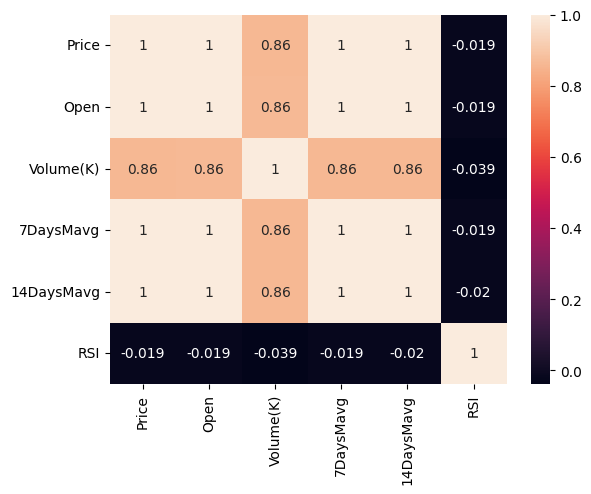

In [538]:
sns.heatmap(df.corr(),annot=True)

In [539]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna()
df.isnull().sum()

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Temp\ipykernel_7712\387178503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


Price         0
Open          0
Volume(K)     0
7DaysMavg     0
14DaysMavg    0
RSI           0
dtype: int64

In [540]:
X=df.drop(columns=['Price'])
X

,Open,Volume(K),7DaysMavg,14DaysMavg,RSI
0,4376.9,904400.0,4348.171429,4339.471429,-107.421875
1,4355.0,644810.0,4348.171429,4339.471429,-107.421875
2,4349.7,744970.0,4348.171429,4339.471429,-107.421875
3,4300.3,782950.0,4348.171429,4339.471429,-107.421875
4,4327.1,894780.0,4348.171429,4339.471429,-107.421875
...,...,...,...,...,...
4149,381.3,9810.0,374.614286,364.992857,310.967742
4150,384.2,10270.0,376.928571,366.864286,224.809160
4151,402.3,10670.0,378.500000,369.050000,201.960784
4152,403.2,7190.0,381.371429,372.085714,173.411765


In [541]:
y=df['Price']
y

0       4341.1
1       4359.8
2       4362.6
3       4346.5
4       4269.9
         ...  
4149     370.6
4150     381.3
4151     384.2
4152     402.3
4153     403.2
Name: Price, Length: 2525, dtype: float64

In [542]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [543]:
mlin=LinearRegression()
mlin.fit(X_train,y_train)

LinearRegression()

In [544]:
cdf1=pd.DataFrame(mlin.coef_,X.columns,columns=['coef_lin'])
cdf1

,coef_lin
Open,0.694743
Volume(K),-0.000007
7DaysMavg,0.466925
14DaysMavg,-0.160520
RSI,0.000083


In [545]:
mlin.intercept_

-0.05042899687373392

In [546]:
pred=mlin.predict(X_test)

In [547]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 12.72856976231603
MSE : 454.3628663390561
RMSE : 21.31578913244959
R2 : 0.9996244632512106
Adj R2 : 0.9996161517150467


In [548]:
mean_abs_err['Mul_LinearReg+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,15.273459,15.273459,15.273465,15.271738,15.271574,15.265481,15.26266,15.26266,15.262682,12.72857


In [549]:
root_mean_sq_err['Mul_LinearReg+'] = [find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,25.696708,25.696708,25.69671,25.659144,25.659137,25.658997,25.808765,25.808765,25.808729,21.315789


In [550]:
R2_score['Mul_LinearReg+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+
0,0.999445,0.999445,0.999445,0.999446,0.999446,0.999446,0.99944,0.99944,0.99944,0.999624


## Ridge

In [551]:
ridm=Ridge(alpha=0.1)
ridm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [552]:
cdf1['coef_ridge']=ridm.coef_
cdf1

,coef_lin,coef_ridge
Open,0.694743,0.694743
Volume(K),-0.000007,-0.000007
7DaysMavg,0.466925,0.466925
14DaysMavg,-0.160520,-0.160520
RSI,0.000083,0.000083


In [553]:
ridm.intercept_

-0.05042900418879981

In [554]:
pred=ridm.predict(X_test)

In [555]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 12.728569716700175
MSE : 454.3628630869205
RMSE : 21.315789056164927
R2 : 0.9996244632538984
Adj R2 : 0.9996161517178102


In [556]:
mean_abs_err['Mul_Ridge_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,15.273459,15.273459,15.273465,15.271738,15.271574,15.265481,15.26266,15.26266,15.262682,12.72857,12.72857


In [557]:
root_mean_sq_err['Mul_Ridge_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,25.696708,25.696708,25.69671,25.659144,25.659137,25.658997,25.808765,25.808765,25.808729,21.315789,21.315789


In [558]:
R2_score['Mul_Ridge_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+
0,0.999445,0.999445,0.999445,0.999446,0.999446,0.999446,0.99944,0.99944,0.99944,0.999624,0.999624


## Lasso

In [559]:
lso=Lasso(alpha=0.1)
lso.fit(X_train,y_train)

C:\Users\SPANDAN CHATTERJEE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.276e+05, tolerance: 3.021e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [560]:
cdf1['coef_lasso']=lso.coef_
cdf1

,coef_lin,coef_ridge,coef_lasso
Open,0.694743,0.694743,0.791309
Volume(K),-0.000007,-0.000007,-0.000007
7DaysMavg,0.466925,0.466925,0.259680
14DaysMavg,-0.160520,-0.160520,-0.049730
RSI,0.000083,0.000083,0.000107


In [561]:
lso.intercept_

-0.2560650223333596

In [562]:
pred=lso.predict(X_test)

In [563]:
print(f"MAE : {mean_absolute_error(y_test,pred)}\nMSE : {mean_squared_error(y_test,pred)}\nRMSE : {find_RMSE(pred,y_test)}\nR2 : {r2_score(y_test,pred)}\nAdj R2 : {find_adj_r2(pred,y_test)}")

MAE : 12.759179247887586
MSE : 463.1818125974588
RMSE : 21.52165915066631
R2 : 0.9996171742787813
Adj R2 : 0.9996092307273413


In [564]:
mean_abs_err['Mul_Lasso_0.1+']=[mean_absolute_error(y_test,pred)]
mean_abs_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,15.273459,15.273459,15.273465,15.271738,15.271574,15.265481,15.26266,15.26266,15.262682,12.72857,12.72857,12.759179


In [565]:
root_mean_sq_err['Mul_Lasso_0.1+']=[find_RMSE(pred,y_test)]
root_mean_sq_err

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,25.696708,25.696708,25.69671,25.659144,25.659137,25.658997,25.808765,25.808765,25.808729,21.315789,21.315789,21.521659


In [566]:
R2_score['Mul_Lasso_0.1+']=[r2_score(y_test,pred)]
R2_score

,Simple_LinearReg,Ridge_alpha_0.1,Lasso_alpha_0.1,Poly_deg_4,Ridge_0.1_Poly_4,Lasso_0.1_Poly_4,Mul_LinearReg,Mul_Ridge_0.1,Mul_Lasso_0.1,Mul_LinearReg+,Mul_Ridge_0.1+,Mul_Lasso_0.1+
0,0.999445,0.999445,0.999445,0.999446,0.999446,0.999446,0.99944,0.99944,0.99944,0.999624,0.999624,0.999617
